In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("crop_production.csv")

In [3]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(dataset, title="Profiling Report")
# profile.to_file("your_report.html")

In [4]:
dataset.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
dataset.shape

(246091, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
dataset.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


# Checking null values

In [8]:
dataset.isnull().sum()
# we have aound 4k null values in this columns so that i will remove this null value-- 1.5 %
print((dataset.isnull().sum()/dataset.shape[0])*100)

# Drop null value

dataset=dataset.dropna()

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64


In [9]:
dataset.isnull().sum()
# We have remove na value sucessfully

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# Check outlier and remove

In [10]:
dataset=dataset[dataset["Production"]!=0]

In [11]:
dataset=dataset.reindex()

In [12]:
# use IQR methodh
dataset["Production"].describe()

count    2.388380e+05
mean     5.910957e+05
std      1.719107e+07
min      1.000000e-02
25%      9.900000e+01
50%      7.840000e+02
75%      7.306270e+03
max      1.250800e+09
Name: Production, dtype: float64

In [13]:
q1=dataset["Production"].quantile(0.25)
q3=dataset["Production"].quantile(0.75)
iqr=q3-q1
print("Q1 :",q1,"Q3 :",q3, "IQR :",iqr)

Q1 : 99.0 Q3 : 7306.2699999999995 IQR : 7207.2699999999995


<AxesSubplot: xlabel='Production'>

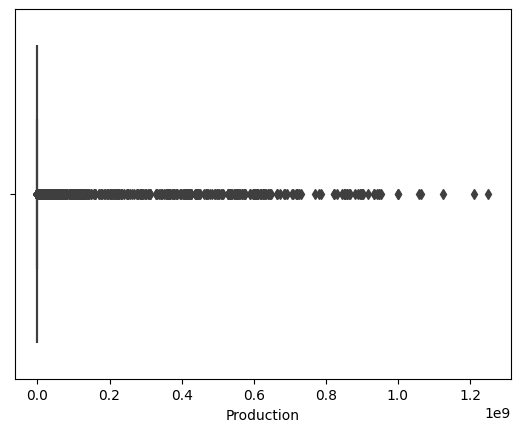

In [14]:
# plot boxPlot for checking the outlier
sn.boxplot(data=dataset,x="Production")
# i have found some outlier in this dataset so i will remove these data in the dataset

In [15]:
min_iqr=q1-(1.5*iqr)
max_iqr=q3+(1.5*iqr)

In [16]:
min_iqr, max_iqr

(-10711.904999999999, 18117.175)

# Exploratory data analysis

In [17]:
dataset[dataset.duplicated()]

# there is no duplicate data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [18]:
dataset.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_15164\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Crop_Year,Area,Production
Crop_Year,1.000000,-0.027791,0.006668
Area,-0.027791,1.000000,0.040487
Production,0.006668,0.040487,1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_15164\1962436247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(dataset.corr(),annot=True)


<AxesSubplot: >

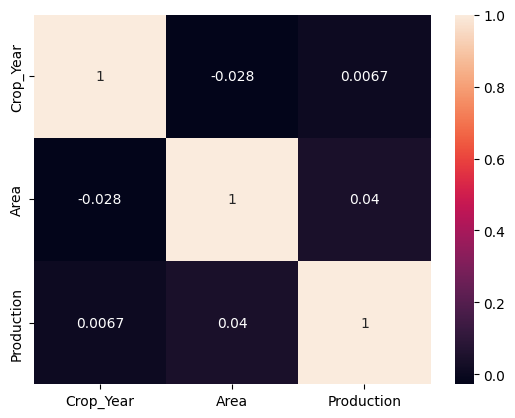

In [19]:
sn.heatmap(dataset.corr(),annot=True)

In [20]:
dataset["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

<AxesSubplot: xlabel='count', ylabel='State_Name'>

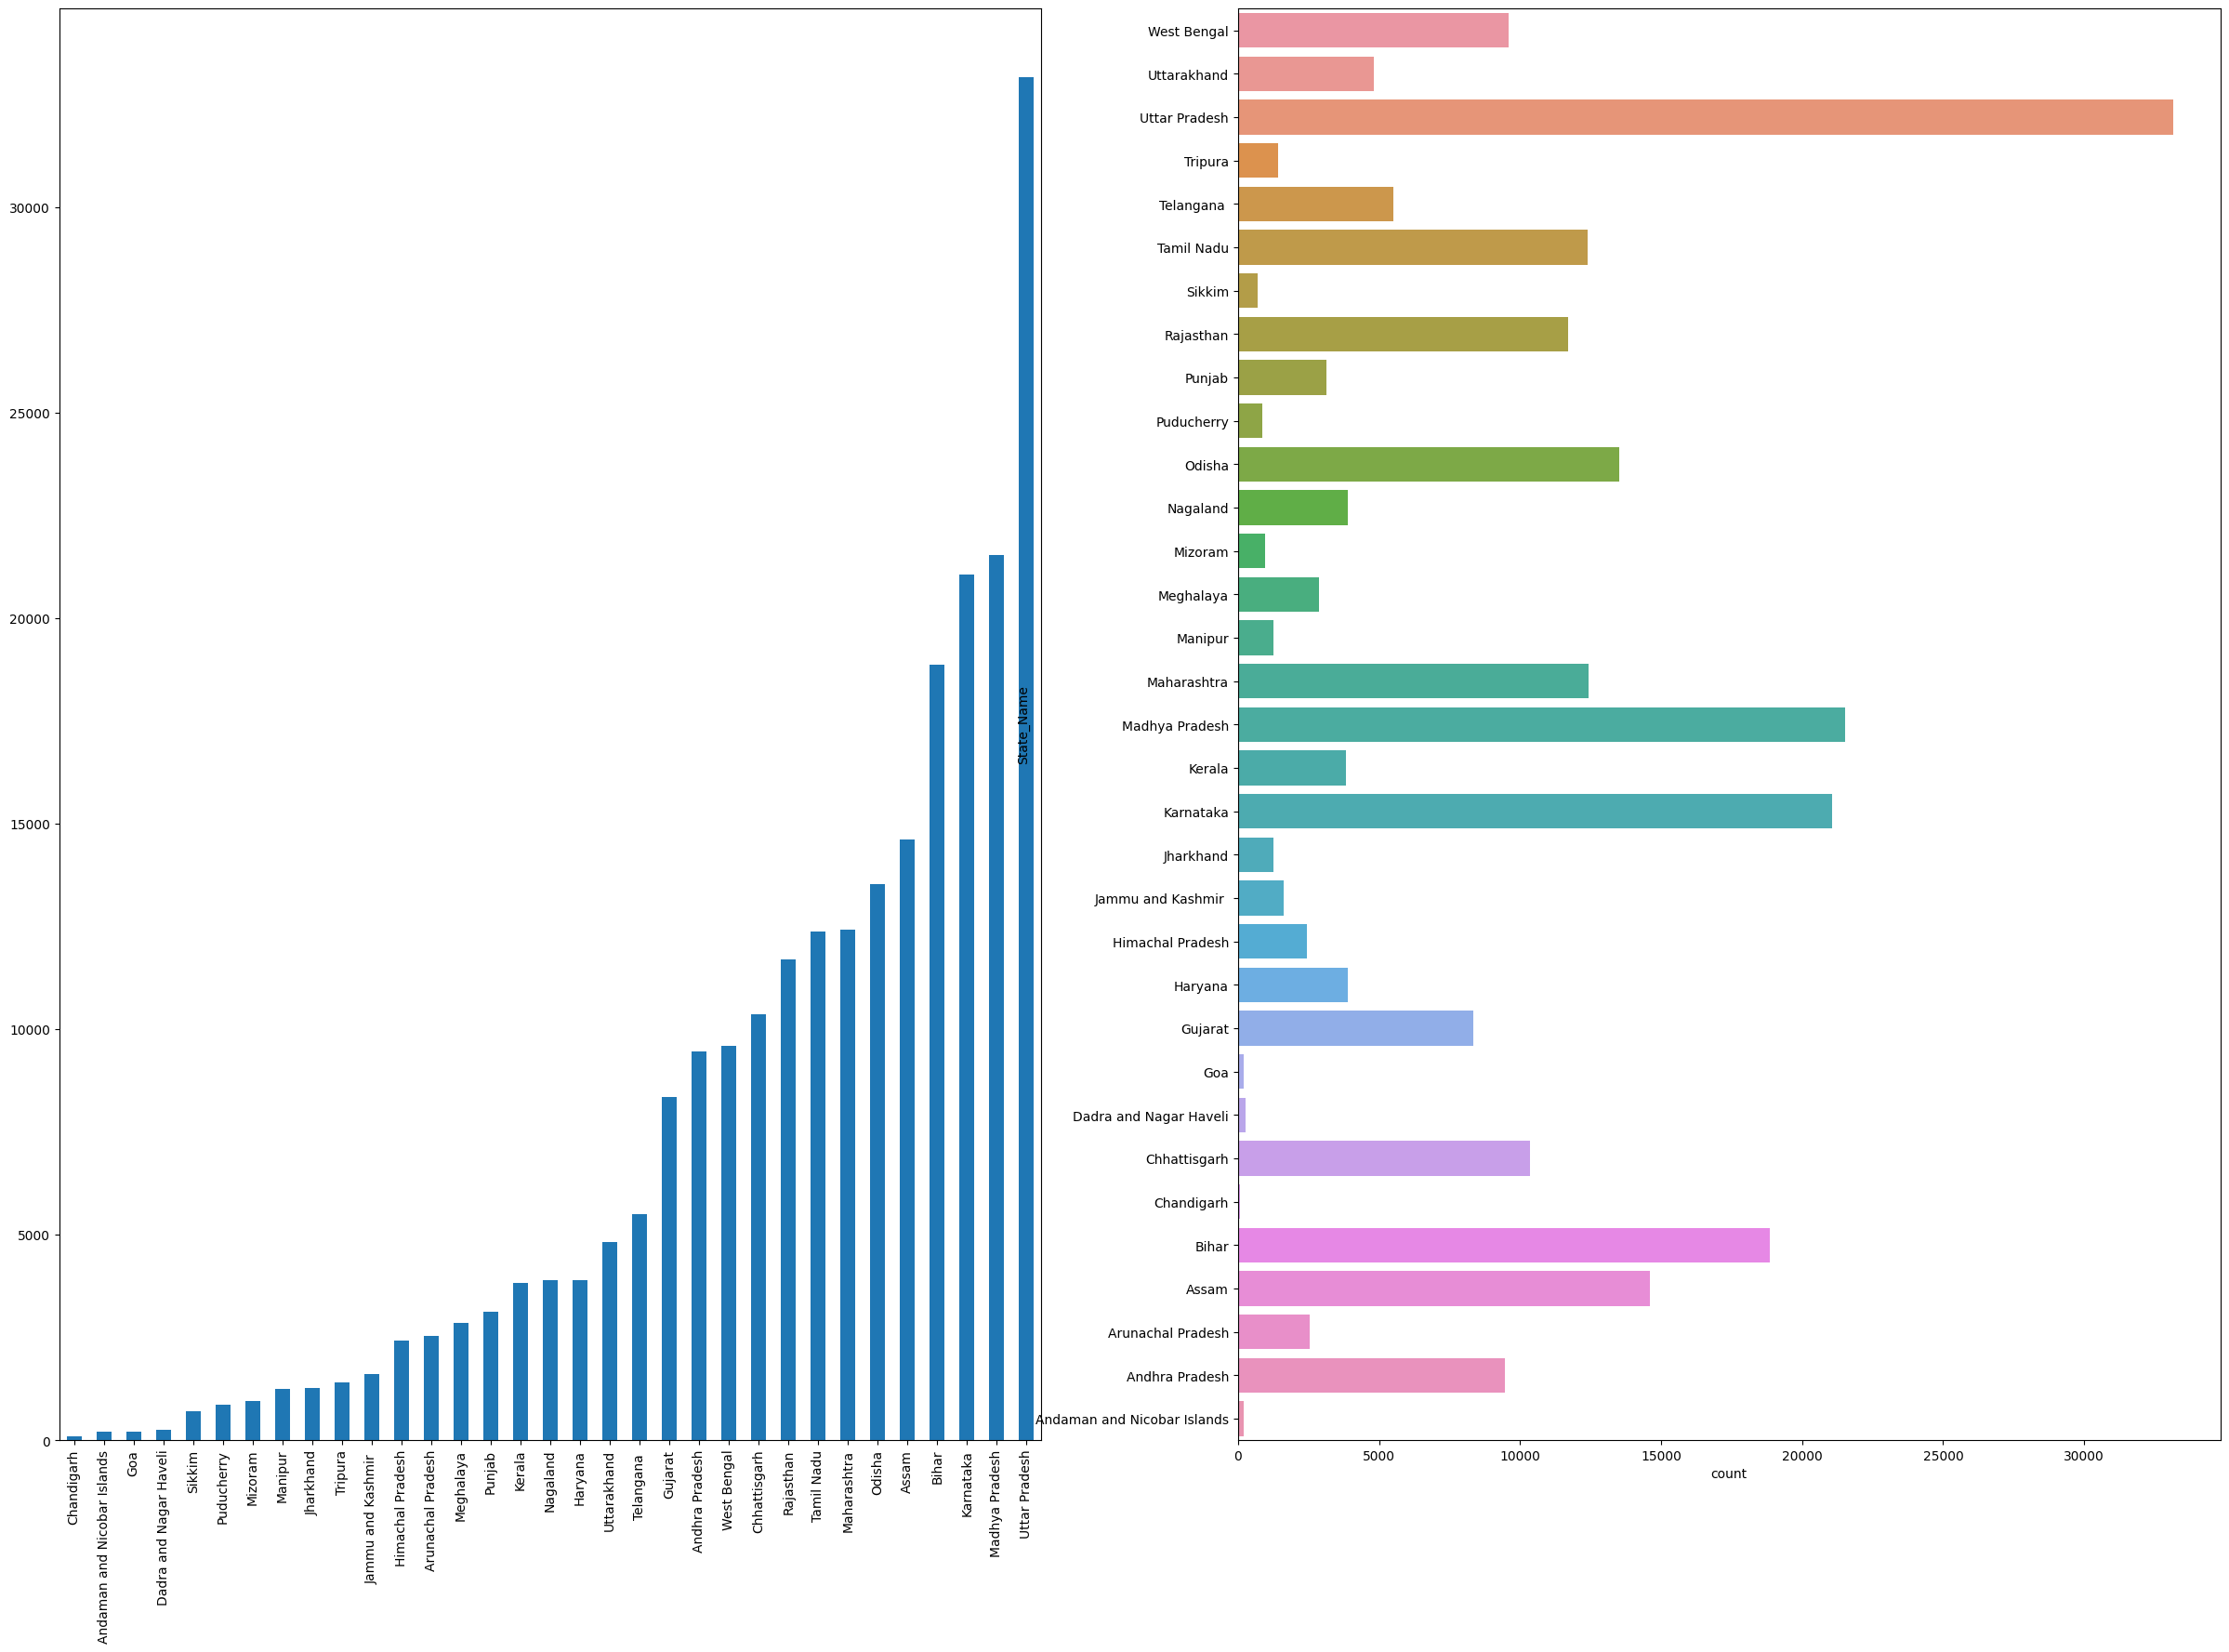

In [21]:
plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
dataset["State_Name"].value_counts().sort_values().plot(kind='bar')
plt.subplot(1,2,2)
sn.countplot(data=dataset.sort_values("State_Name",ascending=False),y="State_Name")

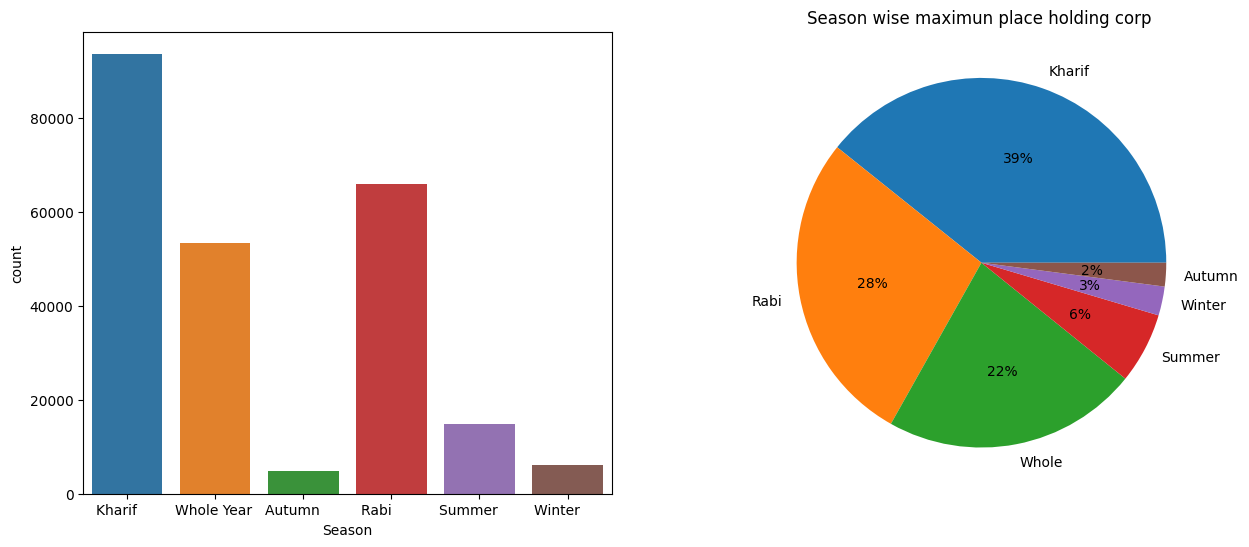

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sn.countplot(data=dataset,x="Season")
plt.subplot(1, 2, 2)
plt.pie(dataset["Season"].value_counts(),labels=["Kharif","Rabi","Whole","Summer","Winter","Autumn"],autopct='%1.0f%%')
plt.title("Season wise maximun place holding corp ")
plt.show()

# Conclusion- We can see below 2 graphs
#1- The top cropping season is Kharif/Ravi and 39%/27% of states produce Kharif/Ravi
#2 - Both crops are most frequnt accur in the dataset as Kharif and Ravi crops are the most useful 
# crops so that every state is producing it

In [23]:
pivot=pd.pivot_table(data=dataset,index="State_Name",values="Production",aggfunc="sum",margins_name="Total")

# Top 5 State in crop Production 

We have got 5 state where crop production is higher then the other state
5 state are mentioned below 

                  
State_Name      Production
Kerala          9.788005e+10
Andhra Pradesh  1.732459e+10
Tamil Nadu      1.207644e+10
Uttar Pradesh   3.234493e+09
Assam           2.111752e+09


<AxesSubplot: xlabel='State_Name'>

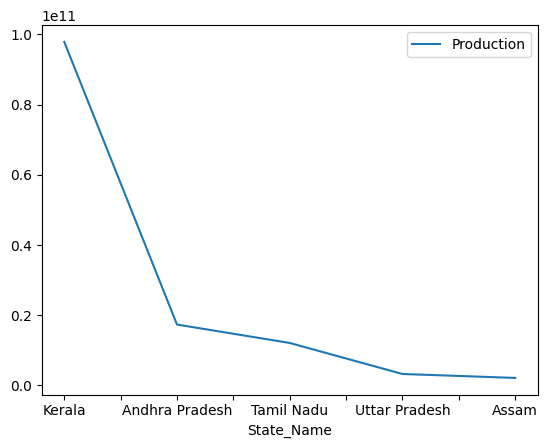

In [24]:
# print(pivot.sort_values(by="Production",ascending=False).head(5))d
pivot.sort_values(by="Production",ascending=False).head(5).plot(kind="line")

# We got top 5 states with the best production in overall states

# Year on Year crop production trand # 

Text(0.5, 1.0, 'Year on Year Productoin Trand')

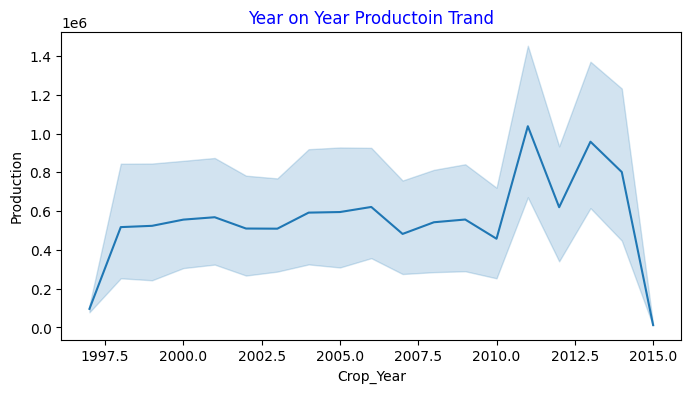

In [25]:
plt.figure(figsize=(8,4))
sn.lineplot(data=dataset,x="Crop_Year",y="Production")
plt.title("Year on Year Productoin Trand",c="b")

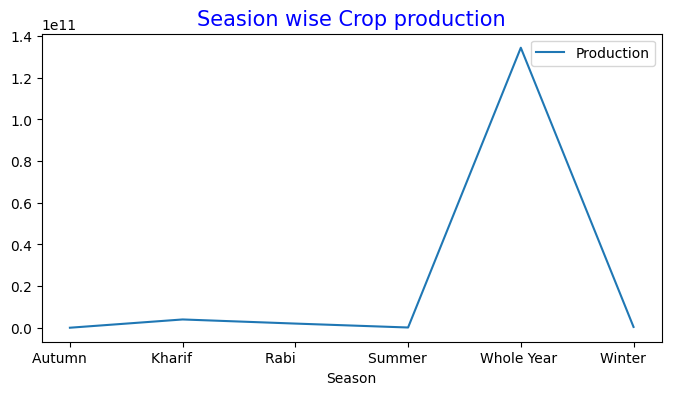

In [26]:
plt.figure(figsize=(8,4))
sn.lineplot(dataset.pivot_table(index="Season",values="Production",aggfunc='sum'))
plt.title("Seasion wise Crop production",c="b",fontsize=15)
plt.show()

In [27]:
dataset.pivot_table(columns="Crop_Year",values="Production",index="State_Name",aggfunc='sum').head(5)

Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
State_Name,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,NaN,NaN,NaN,8.906091e+07,8.971870e+07,9.438714e+07,9.529645e+07,8.718650e+07,7.850788e+07,8.900975e+07,NaN,NaN,NaN,9.505591e+07,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,21093500.0,24997600.0,25276766.0,1.109120e+09,1.139997e+09,1.171722e+09,1.209746e+09,1.214759e+09,9.107880e+08,1.346439e+09,3.200800e+07,9.921911e+08,1.166252e+09,2.873887e+07,1.452100e+09,1.701193e+09,1.645887e+09,2.132282e+09,NaN
Arunachal Pradesh,267148.0,311280.0,325901.0,3.329420e+05,3.405550e+05,3.527260e+05,3.587950e+05,3.232030e+05,3.399220e+05,3.612000e+05,3.729500e+05,3.888440e+05,5.623536e+05,3.993450e+05,4.206430e+05,4.344890e+05,4.502740e+05,4.813420e+05,NaN
Assam,5778334.0,156721536.0,157506193.0,1.433240e+08,1.709150e+08,1.676905e+08,1.618438e+08,2.106991e+08,6.383577e+06,1.417919e+08,1.537170e+08,1.876241e+08,1.945607e+08,1.952464e+08,1.382907e+07,1.354579e+07,1.524730e+07,1.532749e+07,NaN
Bihar,19031372.0,18859126.0,14905938.0,1.947055e+07,2.072202e+07,1.886389e+07,1.898583e+07,1.463596e+07,1.612253e+07,1.307609e+07,1.907658e+07,1.969184e+07,1.494539e+07,2.411544e+07,1.981728e+07,3.108441e+07,3.104645e+07,3.203288e+07,NaN


# Data preprocessing

In [28]:
dataset.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0


In [29]:
# Encoading

In [30]:
cato_data=dataset[["State_Name",'District_Name','Season','Crop']]

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
or_cod=OrdinalEncoder()

In [33]:
or_cod.fit(cato_data)

OrdinalEncoder()

In [34]:
or_coding_trans=or_cod.transform(cato_data)

In [35]:
new=pd.DataFrame(or_coding_trans,columns=cato_data.columns)

new=new.reset_index()

In [36]:
temp=dataset[["Crop_Year","Area","Production"]]
temp=temp.reset_index()

In [37]:
semi_fin=pd.concat((new,temp),axis=1)

In [38]:
semi_fin=semi_fin.drop(columns=["index"])

In [39]:
semi_fin.head(1)

,State_Name,District_Name,Season,Crop,Crop_Year,Area,Production
0,0.0,427.0,1.0,1.0,2000,1254.0,2000.0


# Split the data (input or output)

In [40]:
input=semi_fin.drop(columns="Production")
output=semi_fin["Production"]

# Feature scalling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
st=StandardScaler()

In [43]:
st.fit(input)

StandardScaler()

In [44]:
new_input=pd.DataFrame(st.transform(input),columns=input.columns)

In [45]:
new_input

,State_Name,District_Name,Season,Crop,Crop_Year,Area
0,-1.742823,0.621687,-0.899894,-2.007113,-1.140834,-0.216530
1,-1.742823,0.621687,-0.899894,0.202642,-1.140834,-0.240978
2,-1.742823,0.621687,-0.899894,0.720554,-1.140834,-0.239025
3,-1.742823,0.621687,1.445322,-1.869004,-1.140834,-0.237580
4,-1.742823,0.621687,1.445322,-1.420147,-1.140834,-0.226957
...,...,...,...,...,...,...
238833,1.468461,0.856683,0.663584,0.720554,1.672975,-0.235042
238834,1.468461,0.856683,0.663584,0.962246,1.672975,-0.228773
238835,1.468461,0.856683,1.445322,1.065828,1.672975,-0.234690
238836,1.468461,0.856683,2.227061,0.720554,1.672975,5.210130


# Train Test Spliting

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_trian,y_test=train_test_split(new_input,output,train_size=0.80,random_state=30)

# Model fitting

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [49]:
lr=LinearRegression()

In [50]:
lr.fit(x_train,y_trian)

LinearRegression()

In [51]:
lr.score(x_train,y_trian),lr.score(x_test,y_test)

(0.005738429852648164, 0.006570619575506864)

In [52]:
y_prd=lr.predict(x_test)

In [53]:
r2_score(y_test,y_prd)

0.006570619575506864

In [54]:
mean_squared_error(y_test,y_prd)

318601230035776.1

In [55]:
mean_absolute_error(y_test,y_prd)

1597262.5487492417

In [56]:
y_prd

array([ 1279209.04141813, -1184201.64715978,  2717121.20654592, ...,
        1362650.61813413,   639267.64674968,  2570328.02683909])

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr=DecisionTreeRegressor()

In [59]:
dtr.fit(x_train,y_trian)

DecisionTreeRegressor()

In [60]:
dtr.score(x_train,y_trian), dtr.score(x_test,y_test)

(1.0, 0.9668497772374349)

In [61]:
y_dtr=dtr.predict(x_test)

In [62]:
r2_score(y_test,y_dtr)

0.9668497772374349